## **Dataset Manipulating and Cleaning**

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import math

# SOME HELP
# https://grok.com/share/bGVnYWN5_e7a60a54-3d91-46e0-98e7-48b2259460a2
# https://chatgpt.com/share/67d92a76-df20-8010-9d21-2b09f5ce21ab

# Load the dataset from the extracted shapefile.
# Downlaoded Admin-0 Dataset from here: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
# Note: You must upload all Files in the ZIP here. As the .shp file requires the rest (at minimum .shx and .dbf)

world = gpd.read_file("/content/ne_10m_admin_0_countries.shp")
print(world.head())

        featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          0          2  Indonesia    IDN         0      2   
1  Admin-0 country          0          3   Malaysia    MYS         0      2   
2  Admin-0 country          0          2      Chile    CHL         0      2   
3  Admin-0 country          0          3    Bolivia    BOL         0      2   
4  Admin-0 country          0          2       Peru    PER         0      2   

                TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
0  Sovereign country   1  Indonesia  ...      None       None      None   
1  Sovereign country   1   Malaysia  ...      None       None      None   
2  Sovereign country   1      Chile  ...      None       None      None   
3  Sovereign country   1    Bolivia  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   

  FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0      

In [2]:
# World2 dataset (just admin, geometry)
world2 = world[['ADMIN','geometry']]
world2

# Adding centroid.x centroid.y
world2['Longitude'] = world.geometry.centroid.x
world2['Latitude'] = world.geometry.centroid.y
world2

# Rename Columns
world3 = world2[['ADMIN', 'geometry','Longitude','Latitude']].rename(columns={'ADMIN': 'Country', 'geometry': "Geometry"})
world3

# Sort
world3_sorted = world3.sort_values(by=world3.columns[0])
print(world3_sorted.head())

# Export to CSV
world3_sorted.to_csv('world3_sorted.csv', index=False)


<ipython-input-2-8c511a412031>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world2['Longitude'] = world.geometry.centroid.x
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-2-8c511a412031>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world2['Latitude'] = world.geometry.centroid.y
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:181

                          Country  \
129                   Afghanistan   
172  Akrotiri Sovereign Base Area   
226                         Aland   
62                        Albania   
121                       Algeria   

                                              Geometry  Longitude   Latitude  
129  POLYGON ((74.54235 37.02167, 74.54742 37.01567...  66.008448  33.836267  
172  POLYGON ((33.01563 34.63442, 33.00994 34.6249,...  32.933995  34.631813  
226  MULTIPOLYGON (((20.2776 60.14216, 20.29762 60....  20.055583  60.186447  
62   POLYGON ((20.56715 41.87318, 20.54172 41.86158...  20.053819  41.142482  
121  POLYGON ((-4.82161 24.99506, -4.99519 25.10209...   2.653091  28.148890  


In [3]:
# Kaggle Dataset of Food Security

# Read CSV # Affordability, Availability, Quality
food = pd.read_csv('/content/Global-Food-Security-Index-2022.csv')
print(food.head())

# Get only Country and Overall score
food2 = food[['Country','Overall score']]
print(food2.head())

# Sort
food2_sorted = food2.sort_values(by=food2.columns[0])
print(food2_sorted.head())

   Unnamed: 0 Rank      Country  Overall score  Affordability  Availability  \
0           0  1st      Finland           83.7           91.9          70.5   
1           1  2nd      Ireland           81.7           92.6          70.5   
2           2  3rd       Norway           80.5           87.2          60.4   
3           3  4th       France           80.2           91.3          69.0   
4           4  5th  Netherlands           80.1           92.7          70.7   

   Quality and Safety  Sustainability and Adaptation  
0                88.4                           82.6  
1                86.1                           75.1  
2                86.8                           87.4  
3                87.7                           70.3  
4                84.7                           69.2  
       Country  Overall score
0      Finland           83.7
1      Ireland           81.7
2       Norway           80.5
3       France           80.2
4  Netherlands           80.1
       Country 

In [4]:
# Checked Which Ones did not Match under Country.

# Kaggle: Change Cote d'Ivoire to Ivory Cost
# food2_sorted
print(food2_sorted.iloc[26,0])
food2_sorted.iloc[26,0] = "Ivory Coast"

#
# Changing Polygon Dataset
# world3_sorted
print(world3_sorted.iloc[61,0])
world3_sorted.iloc[61,0] = "Czech Republic"

print(world3_sorted.iloc[183,0])
world3_sorted.iloc[183,0] = "Serbia"

print(world3_sorted.iloc[242,0])
world3_sorted.iloc[242,0] = "Tanzania"

print(world3_sorted.iloc[245,0])
world3_sorted.iloc[245,0] = "United States"

Côte d'Ivoire
Czechia
Republic of Serbia
United Republic of Tanzania
United States of America


In [5]:
# At this point we have 2 Datasets
# A with Country Name and Food Security Score
# B with Country Name, Polygon Data, Centroid x and y.
print(world3_sorted.head())
print(food2_sorted.head())

                          Country  \
129                   Afghanistan   
172  Akrotiri Sovereign Base Area   
226                         Aland   
62                        Albania   
121                       Algeria   

                                              Geometry  Longitude   Latitude  
129  POLYGON ((74.54235 37.02167, 74.54742 37.01567...  66.008448  33.836267  
172  POLYGON ((33.01563 34.63442, 33.00994 34.6249,...  32.933995  34.631813  
226  MULTIPOLYGON (((20.2776 60.14216, 20.29762 60....  20.055583  60.186447  
62   POLYGON ((20.56715 41.87318, 20.54172 41.86158...  20.053819  41.142482  
121  POLYGON ((-4.82161 24.99506, -4.99519 25.10209...   2.653091  28.148890  
       Country  Overall score
67     Algeria           58.9
100     Angola           43.7
53   Argentina           64.8
21   Australia           75.4
11     Austria           78.1


In [6]:
# Now we MERGE datasets
main_world_food = pd.merge(world3_sorted, food2_sorted, on="Country", how="inner")
print(main_world_food.head())

     Country                                           Geometry   Longitude  \
0    Algeria  POLYGON ((-4.82161 24.99506, -4.99519 25.10209...    2.653091   
1     Angola  MULTIPOLYGON (((13.0737 -4.63532, 13.06533 -4....   17.536985   
2  Argentina  MULTIPOLYGON (((-67.1939 -22.82222, -67.14269 ...  -65.173077   
3  Australia  MULTIPOLYGON (((131.5359 -31.60556, 131.34555 ...  134.491119   
4    Austria  POLYGON ((16.94504 48.60417, 16.95434 48.5574,...   14.130673   

    Latitude  Overall score  
0  28.148890           58.9  
1 -12.292316           43.7  
2 -35.378679           64.8  
3 -25.732311           75.4  
4  47.585657           78.1  


In [7]:
# Export to CSV [OPTIONAL]
main_world_food.to_csv('main_world_food.csv', index=False)
print(main_world_food.head())

     Country                                           Geometry   Longitude  \
0    Algeria  POLYGON ((-4.82161 24.99506, -4.99519 25.10209...    2.653091   
1     Angola  MULTIPOLYGON (((13.0737 -4.63532, 13.06533 -4....   17.536985   
2  Argentina  MULTIPOLYGON (((-67.1939 -22.82222, -67.14269 ...  -65.173077   
3  Australia  MULTIPOLYGON (((131.5359 -31.60556, 131.34555 ...  134.491119   
4    Austria  POLYGON ((16.94504 48.60417, 16.95434 48.5574,...   14.130673   

    Latitude  Overall score  
0  28.148890           58.9  
1 -12.292316           43.7  
2 -35.378679           64.8  
3 -25.732311           75.4  
4  47.585657           78.1  


### PART 2
- Determining the shortest Haversine Distance between Country and the Top 10 Exporters

In [8]:
# Get Only Country and Latitude from Primary Dataframe
skimmed_world_food = main_world_food[['Country','Longitude','Latitude']]
print(skimmed_world_food.head())

     Country   Longitude   Latitude
0    Algeria    2.653091  28.148890
1     Angola   17.536985 -12.292316
2  Argentina  -65.173077 -35.378679
3  Australia  134.491119 -25.732311
4    Austria   14.130673  47.585657


In [9]:
# Get Top 10 Exporters from: WTS
# Country, Export US$ Thousands
# Ranked by Export Value
topten = pd.read_csv('/content/WTS-partmer.csv')
print(topten.head())

# Change Partner Name to Country
topten_name = topten[['Partner Name']].rename(columns={'Partner Name': 'Country'})
print(topten_name.head())

# Making Export Valuations by Millions instead of 1000s
topten['Export (USD Million)'] = topten['Export (US$ Thousand)']/1000
topten = topten.drop(columns=['Export (US$ Thousand)'])
print(topten)

     Partner Name  Export (US$ Thousand)
0   United States           1.146460e+08
1  United Kingdom           6.338519e+07
2         Germany           4.536444e+07
3           China           3.823147e+07
4     Netherlands           3.258102e+07
          Country
0   United States
1  United Kingdom
2         Germany
3           China
4     Netherlands
     Partner Name  Export (USD Million)
0   United States          114646.01550
1  United Kingdom           63385.18583
2         Germany           45364.43721
3           China           38231.47145
4     Netherlands           32581.02187
5          France           31276.23478
6          Canada           28695.03491
7           Japan           28507.00358
8         Belgium           21847.23276
9           Italy           18284.28315


In [10]:
# Merge the Coordinates and Countries
topten_centroids = pd.merge(topten_name, skimmed_world_food, on="Country", how="inner")
print(topten_centroids)

          Country   Longitude   Latitude
0   United States -112.496164  45.688119
1  United Kingdom   -2.886951  54.147048
2         Germany   10.381494  51.106364
3           China  103.832592  36.559273
4     Netherlands    5.216814  52.069792
5          France   -2.755221  42.180107
6          Canada  -98.293713  61.376351
7           Japan  137.978348  37.551177
8         Belgium    4.639961  50.637462
9           Italy   12.071907  42.786434


In [11]:
# Tranpose
data = {}
for _, row in topten_centroids.iterrows():
    data[f"{row['Country']}_long"] = row['Longitude']
    data[f"{row['Country']}_lat"] = row['Latitude']

# Create a new dataframe from the dictionary. This will be a single-row dataframe. #Thanks CHATGPT
topten_centroids_tranposed = pd.DataFrame([data])
print(topten_centroids_tranposed)
#print(topten_centroids_tranposed)
#topten_centroids_tranposed

   United States_long  United States_lat  United Kingdom_long  \
0         -112.496164          45.688119            -2.886951   

   United Kingdom_lat  Germany_long  Germany_lat  China_long  China_lat  \
0           54.147048     10.381494    51.106364  103.832592  36.559273   

   Netherlands_long  Netherlands_lat  France_long  France_lat  Canada_long  \
0          5.216814        52.069792    -2.755221   42.180107   -98.293713   

   Canada_lat  Japan_long  Japan_lat  Belgium_long  Belgium_lat  Italy_long  \
0   61.376351  137.978348  37.551177      4.639961    50.637462   12.071907   

   Italy_lat  
0  42.786434  


In [12]:
# Waste Time?
world_topten = skimmed_world_food

for col in topten_centroids_tranposed.columns:
  world_topten[col] = topten_centroids_tranposed[col].iloc[0]

world_topten

<ipython-input-12-abfffac0ecbf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_topten[col] = topten_centroids_tranposed[col].iloc[0]


,Country,Longitude,Latitude,United States_long,United States_lat,United Kingdom_long,United Kingdom_lat,Germany_long,Germany_lat,China_long,...,France_long,France_lat,Canada_long,Canada_lat,Japan_long,Japan_lat,Belgium_long,Belgium_lat,Italy_long,Italy_lat
0,Algeria,2.653091,28.148890,-112.496164,45.688119,-2.886951,54.147048,10.381494,51.106364,103.832592,...,-2.755221,42.180107,-98.293713,61.376351,137.978348,37.551177,4.639961,50.637462,12.071907,42.786434
1,Angola,17.536985,-12.292316,-112.496164,45.688119,-2.886951,54.147048,10.381494,51.106364,103.832592,...,-2.755221,42.180107,-98.293713,61.376351,137.978348,37.551177,4.639961,50.637462,12.071907,42.786434
2,Argentina,-65.173077,-35.378679,-112.496164,45.688119,-2.886951,54.147048,10.381494,51.106364,103.832592,...,-2.755221,42.180107,-98.293713,61.376351,137.978348,37.551177,4.639961,50.637462,12.071907,42.786434
3,Australia,134.491119,-25.732311,-112.496164,45.688119,-2.886951,54.147048,10.381494,51.106364,103.832592,...,-2.755221,42.180107,-98.293713,61.376351,137.978348,37.551177,4.639961,50.637462,12.071907,42.786434
4,Austria,14.130673,47.585657,-112.496164,45.688119,-2.886951,54.147048,10.381494,51.106364,103.832592,...,-2.755221,42.180107,-98.293713,61.376351,137.978348,37.551177,4.639961,50.637462,12.071907,42.786434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Uzbekistan,63.139909,41.756036,-112.496164,45.688119,-2.886951,54.147048,10.381494,51.106364,103.832592,...,-2.755221,42.180107,-98.293713,61.376351,137.978348,37.551177,4.639961,50.637462,12.071907,42.786434
108,Venezuela,-66.168840,7.127732,-112.496164,45.688119,-2.886951,54.147048,10.381494,51.106364,103.832592,...,-2.755221,42.180107,-98.293713,61.376351,137.978348,37.551177,4.639961,50.637462,12.071907,42.786434
109,Vietnam,106.300935,16.642183,-112.496164,45.688119,-2.886951,54.147048,10.381494,51.106364,103.832592,...,-2.755221,42.180107,-98.293713,61.376351,137.978348,37.551177,4.639961,50.637462,12.071907,42.786434
110,Yemen,47.590602,15.905421,-112.496164,45.688119,-2.886951,54.147048,10.381494,51.106364,103.832592,...,-2.755221,42.180107,-98.293713,61.376351,137.978348,37.551177,4.639961,50.637462,12.071907,42.786434


In [13]:
# IM NOT GONNA DOUBLE CHECK
# CHATGPT LINK: https://chatgpt.com/share/67d92a76-df20-8010-9d21-2b09f5ce21ab
# Define the haversine function (distance in kilometers)
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    R = 6371  # Radius of Earth in kilometers
    return c * R

# Number of coordinate pairs
num_pairs = 10

# List to store computed distances
distances_list = []

# Loop through each row
for i in range(len(world_topten)):
    # Extract reference coordinates from **columns 1 and 2** (longitude_a, latitude_a)
    ref_lon = world_topten.iloc[i, 1]  # Was column 2, now 1 (longitude_a)
    ref_lat = world_topten.iloc[i, 2]  # Was column 3, now 2 (latitude_a)

    row_distances = []

    # Update loop starting point (pairs start at column 3 instead of 4)
    for j in range(3, 3 + 2 * num_pairs, 2):  # Pairs now start at column 3
        curr_lon = world_topten.iloc[i, j]     # longitude for the pair
        curr_lat = world_topten.iloc[i, j + 1] # latitude for the pair
        distance = haversine(ref_lat, ref_lon, curr_lat, curr_lon)
        row_distances.append(distance)

    distances_list.append(row_distances)

# Convert to DataFrame
df_distances = pd.DataFrame(distances_list)

# Template: Replace these with your desired column names.
custom_names = [
    "United States",
    "United Kingdom",
    "Germany",
    "China",
    "Netherlands",
    "France",
    "Canada",
    "Japan",
    "Belgium",
    "Italy"
]

# Rename the new dataframe's columns using your custom names
df_distances.columns = custom_names

print(df_distances)

     United States  United Kingdom       Germany         China   Netherlands  \
0      9524.101077     2925.728564   2633.681183   9088.895760   2668.393961   
1     14038.882323     7635.723037   7083.610259  10492.894760   7254.131482   
2     10187.205076    11598.860261  12102.410193  19017.557742  11871.849796   
3     13768.869139    15316.436936  14558.447947   7635.130076  14885.373916   
4      8416.281815     1394.152865    476.333500   7086.593311    809.859929   
..             ...             ...           ...           ...           ...   
107   10282.105793     4911.217109   4080.774437   3522.446741   4420.375349   
108    6163.299913     7648.528812   8453.687344  15046.658200   8115.942251   
109   12060.623838     9703.596732   8978.210114   2227.995224   9288.195990   
110   12878.664332     6061.034494   5118.898585   5967.310611   5475.229183   
111   14850.578819     8057.521610   7375.028546   9691.653214   7603.278370   

           France        Canada        

In [14]:
# Get shorted distance in the 10 Columns
df_distances["Shortest_Distance"] = df_distances.min(axis=1)
print(df_distances)

     United States  United Kingdom       Germany         China   Netherlands  \
0      9524.101077     2925.728564   2633.681183   9088.895760   2668.393961   
1     14038.882323     7635.723037   7083.610259  10492.894760   7254.131482   
2     10187.205076    11598.860261  12102.410193  19017.557742  11871.849796   
3     13768.869139    15316.436936  14558.447947   7635.130076  14885.373916   
4      8416.281815     1394.152865    476.333500   7086.593311    809.859929   
..             ...             ...           ...           ...           ...   
107   10282.105793     4911.217109   4080.774437   3522.446741   4420.375349   
108    6163.299913     7648.528812   8453.687344  15046.658200   8115.942251   
109   12060.623838     9703.596732   8978.210114   2227.995224   9288.195990   
110   12878.664332     6061.034494   5118.898585   5967.310611   5475.229183   
111   14850.578819     8057.521610   7375.028546   9691.653214   7603.278370   

           France        Canada        

In [15]:
# New Column of Country Name (from top 10 Food export) based Shortest Distance
df_distances["Closest Country"] = df_distances[custom_names].idxmin(axis=1)
print(df_distances)
df_distances


     United States  United Kingdom       Germany         China   Netherlands  \
0      9524.101077     2925.728564   2633.681183   9088.895760   2668.393961   
1     14038.882323     7635.723037   7083.610259  10492.894760   7254.131482   
2     10187.205076    11598.860261  12102.410193  19017.557742  11871.849796   
3     13768.869139    15316.436936  14558.447947   7635.130076  14885.373916   
4      8416.281815     1394.152865    476.333500   7086.593311    809.859929   
..             ...             ...           ...           ...           ...   
107   10282.105793     4911.217109   4080.774437   3522.446741   4420.375349   
108    6163.299913     7648.528812   8453.687344  15046.658200   8115.942251   
109   12060.623838     9703.596732   8978.210114   2227.995224   9288.195990   
110   12878.664332     6061.034494   5118.898585   5967.310611   5475.229183   
111   14850.578819     8057.521610   7375.028546   9691.653214   7603.278370   

           France        Canada        

,United States,United Kingdom,Germany,China,Netherlands,France,Canada,Japan,Belgium,Italy,Shortest_Distance,Closest Country
0,9524.101077,2925.728564,2633.681183,9088.895760,2668.393961,1634.883790,7838.637705,11352.668688,2506.208990,1834.709588,1634.883790,France
1,14038.882323,7635.723037,7083.610259,10492.894760,7254.131482,6402.332434,12565.676033,13508.166803,7108.830941,6149.768912,6149.768912,Italy
2,10187.205076,11598.860261,12102.410193,19017.557742,11871.849796,10703.401522,11167.652101,17936.035009,11743.962485,11690.981296,10187.205076,United States
3,13768.869139,15316.436936,14558.447947,7635.130076,14885.373916,15724.754872,14449.705300,7046.231269,14963.514574,14510.071188,7046.231269,Japan
4,8416.281815,1394.152865,476.333500,7086.593311,809.859929,1455.889396,6487.692311,9034.607394,768.876480,557.450981,476.333500,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...
107,10282.105793,4911.217109,4080.774437,3522.446741,4420.375349,5304.641611,8425.331933,6216.364648,4486.819554,4137.862532,3522.446741,China
108,6163.299913,7648.528812,8453.687344,15046.658200,8115.942251,7299.298620,6586.849820,14450.635627,8047.597936,8511.323384,6163.299913,United States
109,12060.623838,9703.596732,8978.210114,2227.995224,9288.195990,10259.310337,11069.748139,3871.451054,9378.309811,9095.381795,2227.995224,China
110,12878.664332,6061.034494,5118.898585,5967.310611,5475.229183,5592.796807,10908.026755,8971.741208,5429.401715,4501.318992,4501.318992,Italy


In [16]:
### APRIL 1 2025 HERE WE GO WE START HEREE
# INSTEAD OF SINGLE HAVERSINE DISTANCE - INDEX
# Index 10 Values that Considers those 10 Countries
# Data tranfsormation - LN() SIGMOID() EXPONENT() LOGIT() HHI() LOOK AT THE FUNCTION SHAPE
# TAKES CONSIDERATION THOSE DISTANCES AND GIVES A SCORE (LIKE SUM, DISTANCE) SUM OF THE LOG OF EACH DISTANCE DISTANCES (NORMALIZED LOG)
# LIKE 1/LN() (SMALLER = HIGHER SCORE) # IF WE WANT SOMETHING LIKE THAT


# TRY TO USE WEIGHTS (BECAUSE THEY ARE RANKED BY TOP 10)

# WE CAN USE FUNCTION FOR DISTANCE WEIGHT

# Creating the Dataset We will do transformations by appending this
# main_world_food
main_world_food_ALL = pd.concat([main_world_food, df_distances], axis=1)

##### THESE ARE THE TWO DATASETS YOU IWLL BE WORKING IWTH
print(main_world_food_ALL.head())
print(topten)

# Cleaner version of main_world_food_ALL
cols_to_drop = main_world_food_ALL.columns[[1, 2, 3]]
main_clean = main_world_food_ALL.drop(columns=cols_to_drop)
print(main_clean)

     Country                                           Geometry   Longitude  \
0    Algeria  POLYGON ((-4.82161 24.99506, -4.99519 25.10209...    2.653091   
1     Angola  MULTIPOLYGON (((13.0737 -4.63532, 13.06533 -4....   17.536985   
2  Argentina  MULTIPOLYGON (((-67.1939 -22.82222, -67.14269 ...  -65.173077   
3  Australia  MULTIPOLYGON (((131.5359 -31.60556, 131.34555 ...  134.491119   
4    Austria  POLYGON ((16.94504 48.60417, 16.95434 48.5574,...   14.130673   

    Latitude  Overall score  United States  United Kingdom       Germany  \
0  28.148890           58.9    9524.101077     2925.728564   2633.681183   
1 -12.292316           43.7   14038.882323     7635.723037   7083.610259   
2 -35.378679           64.8   10187.205076    11598.860261  12102.410193   
3 -25.732311           75.4   13768.869139    15316.436936  14558.447947   
4  47.585657           78.1    8416.281815     1394.152865    476.333500   

          China   Netherlands        France        Canada         Ja

In [17]:
# Start Here

In [18]:
# Weighted Average and Maybe LOG
import seaborn as sb

In [19]:
# Getting Weights
topten
total_export = topten['Export (USD Million)'].sum()
topten['Weight'] = topten['Export (USD Million)'] / total_export
topten

# No need to Tranpose for Matrix Mult
print(topten.iloc[:,2])

0    0.271147
1    0.149911
2    0.107291
3    0.090421
4    0.077057
5    0.073971
6    0.067866
7    0.067421
8    0.051671
9    0.043244
Name: Weight, dtype: float64


In [20]:
# Matrix Multiplication
main_clean

,Country,Overall score,United States,United Kingdom,Germany,China,Netherlands,France,Canada,Japan,Belgium,Italy,Shortest_Distance,Closest Country
0,Algeria,58.9,9524.101077,2925.728564,2633.681183,9088.895760,2668.393961,1634.883790,7838.637705,11352.668688,2506.208990,1834.709588,1634.883790,France
1,Angola,43.7,14038.882323,7635.723037,7083.610259,10492.894760,7254.131482,6402.332434,12565.676033,13508.166803,7108.830941,6149.768912,6149.768912,Italy
2,Argentina,64.8,10187.205076,11598.860261,12102.410193,19017.557742,11871.849796,10703.401522,11167.652101,17936.035009,11743.962485,11690.981296,10187.205076,United States
3,Australia,75.4,13768.869139,15316.436936,14558.447947,7635.130076,14885.373916,15724.754872,14449.705300,7046.231269,14963.514574,14510.071188,7046.231269,Japan
4,Austria,78.1,8416.281815,1394.152865,476.333500,7086.593311,809.859929,1455.889396,6487.692311,9034.607394,768.876480,557.450981,476.333500,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Uzbekistan,57.5,10282.105793,4911.217109,4080.774437,3522.446741,4420.375349,5304.641611,8425.331933,6216.364648,4486.819554,4137.862532,3522.446741,China
108,Venezuela,42.6,6163.299913,7648.528812,8453.687344,15046.658200,8115.942251,7299.298620,6586.849820,14450.635627,8047.597936,8511.323384,6163.299913,United States
109,Vietnam,67.9,12060.623838,9703.596732,8978.210114,2227.995224,9288.195990,10259.310337,11069.748139,3871.451054,9378.309811,9095.381795,2227.995224,China
110,Yemen,40.1,12878.664332,6061.034494,5118.898585,5967.310611,5475.229183,5592.796807,10908.026755,8971.741208,5429.401715,4501.318992,4501.318992,Italy


In [21]:
# Matrix Multi
a = main_clean.iloc[:, 2:12].to_numpy() #arrays
b = topten.iloc[:,2].to_numpy()
result = []

for i in range(a.shape[0]):
  mmult = a[i,:] @ b
  result.append(mmult)

#print(result)

In [22]:
# Just Double Checking
# First Row
vector1 = np.array([9524.101077, 2925.728564, 2633.681183, 9088.895760, 2668.393961, 1634.883790, 7838.637705, 11352.668688, 2506.208990, 1834.709588])
vector2 = np.array([0.271147, 0.149911, 0.107291, 0.090421, 0.077057, 0.073971, 0.067866, 0.067421, 0.051671, 0.043244])

dot = np.dot(vector1, vector2)

print(dot)

# Last Row
vector1 = np.array([14850.578819, 8057.52161, 7375.028546, 9691.653214, 7603.27837, 6930.061828, 13187.152395, 12686.107164, 7474.198734, 6456.325746])
vector2 = np.array([0.271147, 0.149911, 0.107291, 0.090421, 0.077057, 0.073971, 0.067866, 0.067421, 0.051671, 0.043244])

dot = np.dot(vector1, vector2)

print(dot)


5958.203851333143
10416.379593827813


In [23]:
result_df = pd.DataFrame(result, columns=['Weighted Average'])
print(result_df)

     Weighted Average
0         5958.210208
1        10089.417624
2        12305.199332
3        13448.413965
4         4466.288138
..                ...
107       6415.239797
108       8455.813578
109       9254.414222
110       8145.390355
111      10416.386168

[112 rows x 1 columns]


In [24]:
main_clean = pd.concat([main_clean, result_df], axis=1)
main_clean

,Country,Overall score,United States,United Kingdom,Germany,China,Netherlands,France,Canada,Japan,Belgium,Italy,Shortest_Distance,Closest Country,Weighted Average
0,Algeria,58.9,9524.101077,2925.728564,2633.681183,9088.895760,2668.393961,1634.883790,7838.637705,11352.668688,2506.208990,1834.709588,1634.883790,France,5958.210208
1,Angola,43.7,14038.882323,7635.723037,7083.610259,10492.894760,7254.131482,6402.332434,12565.676033,13508.166803,7108.830941,6149.768912,6149.768912,Italy,10089.417624
2,Argentina,64.8,10187.205076,11598.860261,12102.410193,19017.557742,11871.849796,10703.401522,11167.652101,17936.035009,11743.962485,11690.981296,10187.205076,United States,12305.199332
3,Australia,75.4,13768.869139,15316.436936,14558.447947,7635.130076,14885.373916,15724.754872,14449.705300,7046.231269,14963.514574,14510.071188,7046.231269,Japan,13448.413965
4,Austria,78.1,8416.281815,1394.152865,476.333500,7086.593311,809.859929,1455.889396,6487.692311,9034.607394,768.876480,557.450981,476.333500,Germany,4466.288138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Uzbekistan,57.5,10282.105793,4911.217109,4080.774437,3522.446741,4420.375349,5304.641611,8425.331933,6216.364648,4486.819554,4137.862532,3522.446741,China,6415.239797
108,Venezuela,42.6,6163.299913,7648.528812,8453.687344,15046.658200,8115.942251,7299.298620,6586.849820,14450.635627,8047.597936,8511.323384,6163.299913,United States,8455.813578
109,Vietnam,67.9,12060.623838,9703.596732,8978.210114,2227.995224,9288.195990,10259.310337,11069.748139,3871.451054,9378.309811,9095.381795,2227.995224,China,9254.414222
110,Yemen,40.1,12878.664332,6061.034494,5118.898585,5967.310611,5475.229183,5592.796807,10908.026755,8971.741208,5429.401715,4501.318992,4501.318992,Italy,8145.390355


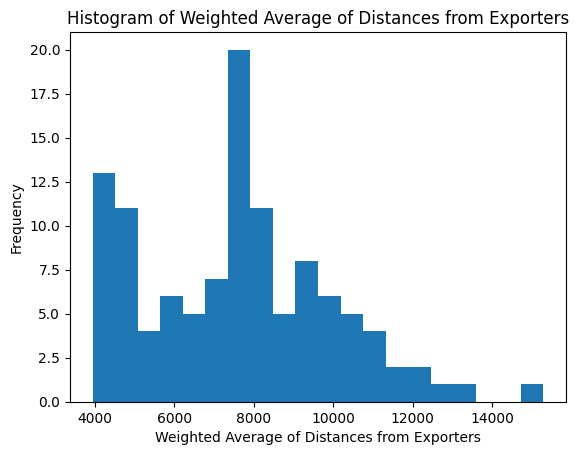

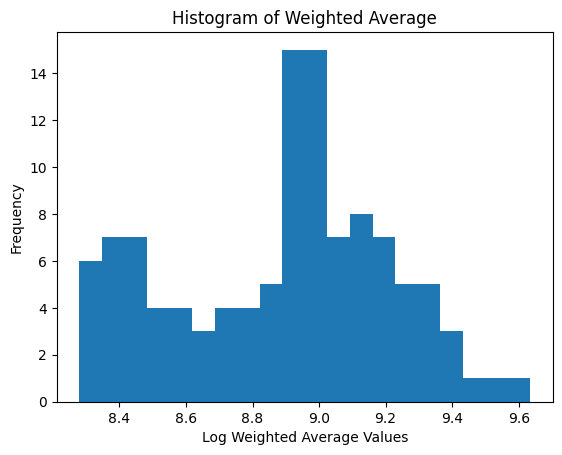

In [25]:
# Plot Weighted Average
plt.hist(main_clean['Weighted Average'], bins=20)  # Adjust bins as needed
plt.title("Histogram of Weighted Average of Distances from Exporters")
plt.xlabel("Weighted Average of Distances from Exporters")
plt.ylabel("Frequency")
plt.show()

# Plot Log Version
plt.hist(np.log(main_clean['Weighted Average']), bins=20)  # Adjust bins as needed
plt.title("Histogram of Weighted Average")
plt.xlabel("Log Weighted Average Values")
plt.ylabel("Frequency")
plt.show()

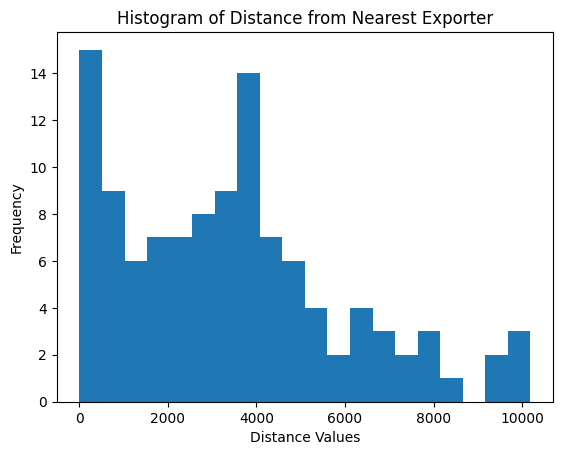

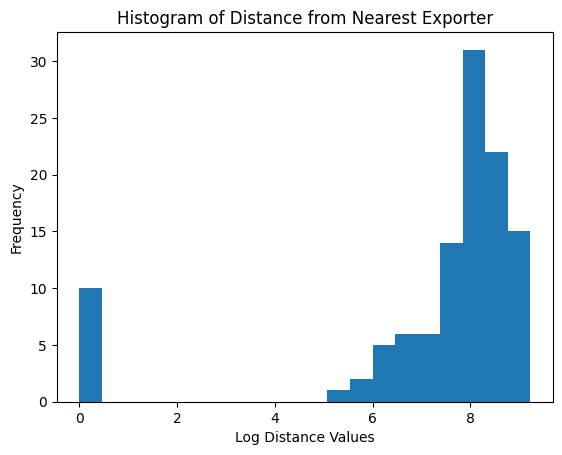

In [26]:
# Plot Shortest Distance
plt.hist(main_clean['Shortest_Distance'], bins=20)  # Adjust bins as needed
plt.title("Histogram of Distance from Nearest Exporter")
plt.xlabel("Distance Values")
plt.ylabel("Frequency")
plt.show()

# Plot Log Version
plt.hist(np.log(main_clean['Shortest_Distance']+1), bins=20)  # Adjust bins as needed
plt.title("Histogram of Distance from Nearest Exporter")
plt.xlabel("Log Distance Values")
plt.ylabel("Frequency")
plt.show()